/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


ValueError: x and y must have same first dimension, but have shapes (1,) and (641,)

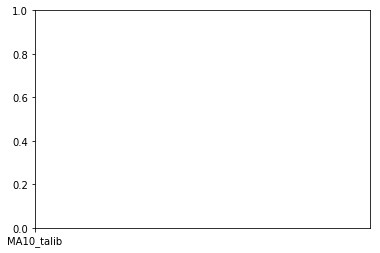

In [7]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('002460')
df['MA10_rolling'] = pd.rolling_mean(df['close'],10)
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10) 
df.tail(12)
plt.plot(df['MA10_talib'])
plt.show()

在Ta-lib的library中，计算平均移动均线的指标叫做SMA (simple moving average)
Ta-lib的语法总结起来，就是array in, array out
function中的第一个参数close是一个数组序列，可以想象成是一个股票很长一段时间以来的收市价的曲线。计算结果avg也是一个数组序列，因为她也是一条曲线，假设我们的close数组中共有最近100天的收市价，我们现在要计算这只股票30天的移动平均线。avg这条移动平均线上共有71个点，因为从第30天开始才能计算30天均值。我们能获得的，是包括今天在内的总共71天的30天平均值

如果我们要获得最近一天(今天）的移动平均值，就是获取avg这条曲线上的最后一个点，相当于数列中的最后一个值。昨天的平均值就是数列中的倒数第二个点，以此类推。


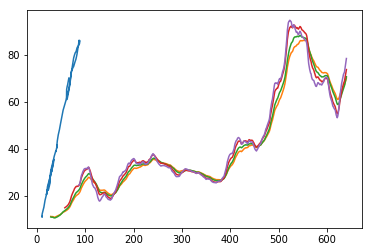

In [9]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('002460')
close = [float(x) for x in df['close']]
avg = talib.SMA(np.array(close), timeperiod=30)
today_mavg = avg[-1]
ystd_mavg = avg[-2]

# MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)

SMA = talib.MA(np.array(close),timeperiod=30,matype=0)
EMA = talib.MA(np.array(close),timeperiod=30,matype=1)
WMA = talib.MA(np.array(close),timeperiod=30,matype=2)
DEMA = talib.MA(np.array(close),timeperiod=30,matype=3)
TEMA = talib.MA(np.array(close),timeperiod=30,matype=4)

plt.plot(SMA)
plt.plot(EMA)
plt.plot(WMA)
plt.plot(DEMA)
plt.plot(TEMA) 
plt.show()

均线有很多不同的计算方法，比如EMA(指数移动平均值）和WMA(加权移动平均值）他们在计算均值时相对均会把更多的权重放在较近的日期，因此会比普通均线更灵敏，更能捕捉到市场的变化。那么我们如何选择到底要使用哪种均线呢？

Ta-lib考虑到这点，专门设计了matype这个变量，用数字代表均线计算方式，可以涵盖多种均线的计算方法。我们画出来看看。